<a href="https://colab.research.google.com/github/jessicasilvacodes/visao_computacional-pucminas/blob/main/02_cbir_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuperação de Informação com base no Conteúdo Visual**

**Descrição de imagens**

Descritor representa a propriedade de uma imagem. O descritor deve ser invariante a rotação, escala, etc.

Exemplo de uma forma (muito simples) de se obter uma representação númerica sobre a imagem por meio de histograma de cor.

In [79]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

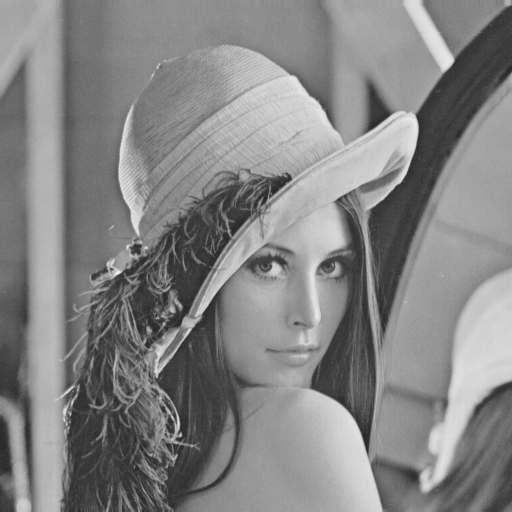

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [80]:
%%time
img_lena = cv2.imread('lena.png',0)

cv2_imshow(img_lena)
# cv2.imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

hist, bins = np.histogram(img_lena.ravel(),256,[0,256])

print(bins)
print(hist)

**Plotting Histograms**

In [81]:
from matplotlib import pyplot as plt

/tmp/ipython-input-1220825731.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_lena.ravel(),256,[0,256]); plt.show()


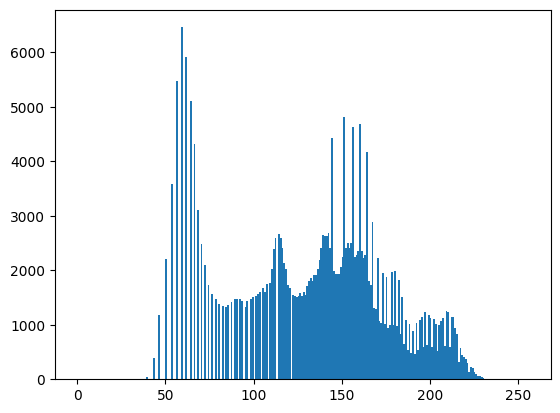

In [82]:
plt.hist(img_lena.ravel(),256,[0,256]); plt.show()

Histograma de cor da imagem nos três canais RGB

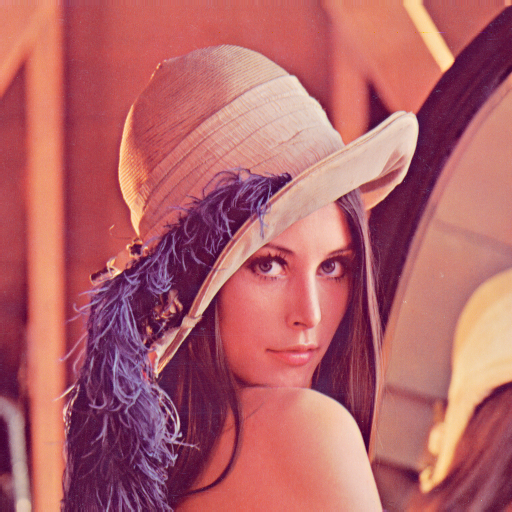

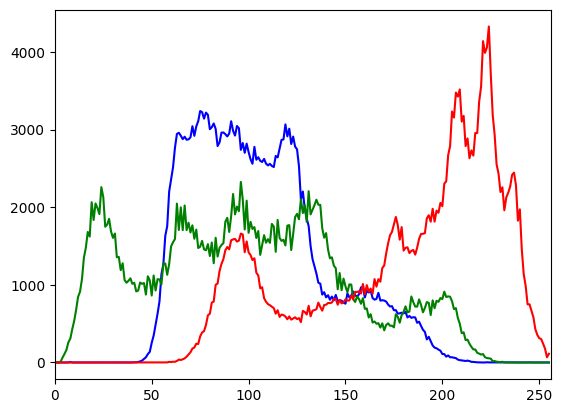

In [83]:
img_lena_bgr = cv2.imread('lena.png')

cv2_imshow(img_lena_bgr)

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_lena_bgr],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

**Feature Detection and Description**

**Features Locais**

Features locais: Padrão que se difere da vizinhança local.
Pontos de interesse: cantos (corners), regiões, etc..

**BRIEF (Binary Robust Independent Elementary Features)**

In [84]:
# para imprimir a matriz completa, descomentar as duas linhas abaixo
# import sys
# np.set_printoptions(threshold=sys.maxsize)

In [85]:
# BRIEF não possui detector de pontos de interesse
# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

In [86]:
img_baggage = cv2.imread('baggage_claim.jpg', 0)

In [87]:
# find the keypoints with STAR
kp = star.detect(img_baggage,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_baggage, kp)

print(len(kp))
print(feat.shape)
print(feat)

479
(479, 32)
[[ 75  12 156 ...  62 164 184]
 [207 174 149 ...  22  63 152]
 [ 76  70 133 ... 104 174 243]
 ...
 [177 240 110 ... 190 224 205]
 [231 185 243 ... 135  59 128]
 [ 17   1 104 ... 215 129 127]]


**ORB (Oriented FAST and Rotated BRIEF)**

o ORB detecta e extrai.

In [88]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img_baggage,None)

print(np.shape(des1))
print(des1)

(500, 32)
[[ 86  75 134 ...  54  57   4]
 [ 97 139  91 ...  42 240 168]
 [220  72 184 ... 243   6  98]
 ...
 [  9 159  72 ... 201 216 153]
 [100 104 204 ... 251  94   2]
 [ 72  60 187 ... 193 103  43]]


Matching de features locais entre duas imagens

In [89]:
import imutils

In [90]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [91]:
img1 = cv2.imread('baggage_claim.jpg',0)
img2 = cv2.imread('baggage_claim.jpg',0)

# rotate image 180°
rotated = imutils.rotate(img2, 180)
img2 = rotated

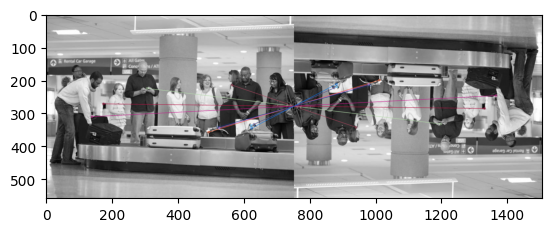

(<matplotlib.image.AxesImage at 0x7b8a8f4f4440>, None)

In [92]:
# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img1,None)
kp2, desc2 = orb.detectAndCompute(img2,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)

plt.imshow(img3),plt.show()

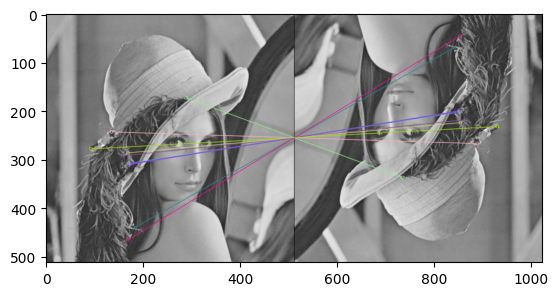

(<matplotlib.image.AxesImage at 0x7b8a8d9cf350>, None)

In [93]:
# rotate image 180°
rotated = imutils.rotate(img_lena, 180)
img_lena_rotated = rotated

# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img_lena,None)
kp2, desc2 = orb.detectAndCompute(img_lena_rotated,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img_lena_matches = cv2.drawMatches(img_lena,kp1,img_lena_rotated,kp2,matches[:10],None,flags=2)

plt.imshow(img_lena_matches),plt.show()

**Busca de vídeo com base em conteúdo visual**

**Lendo um vídeo em OpenCV**

Abre e extrai keyframes do vídeo salvando em disco

In [94]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [95]:
frames_dir = "frames/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

videos = "videos/"

search = "search/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

if not os.path.exists(features_dir):
    os.makedirs(features_dir)

if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

if not os.path.exists(videos):
    os.makedirs(videos)

if not os.path.exists(search):
    os.makedirs(search)

In [96]:
# video path
video_dir = "videos/"

# video file
video = "airport.mp4"

# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

# Check if video file exists
if not os.path.exists(video):
    print(f"Error: Video file not found at {video}")
    cap.release() # Release the VideoCapture object if it was created
else:
    # Check if video capture was opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file {video}")
    else:
        # frames per second
        video_frames = 30

        # frame id
        id_frame = 0

        ret = True
        while ret:
            # capture frame by frame
            ret, frame = cap.read()

            # video length
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            if (id_frame % video_frames) == 0 and ret:

                print("Proccessing frame " + str(id_frame) + " of " + str(length))

                frame_path = os.path.join(frames_dir, str(id_frame) + ".png")

                # salva a imagem (frame) no disco
                cv2.imwrite(frame_path, frame)

            id_frame += 1

        print("Done")

    # Release the VideoCapture object
    cap.release()

Proccessing frame 0 of 749
Proccessing frame 30 of 749
Proccessing frame 60 of 749
Proccessing frame 90 of 749
Proccessing frame 120 of 749
Proccessing frame 150 of 749
Proccessing frame 180 of 749
Proccessing frame 210 of 749
Proccessing frame 240 of 749
Proccessing frame 270 of 749
Proccessing frame 300 of 749
Proccessing frame 330 of 749
Proccessing frame 360 of 749
Proccessing frame 390 of 749
Proccessing frame 420 of 749
Proccessing frame 450 of 749
Proccessing frame 480 of 749
Proccessing frame 510 of 749
Proccessing frame 540 of 749
Proccessing frame 570 of 749
Proccessing frame 600 of 749
Proccessing frame 630 of 749
Proccessing frame 660 of 749
Proccessing frame 690 of 749
Proccessing frame 720 of 749
Done


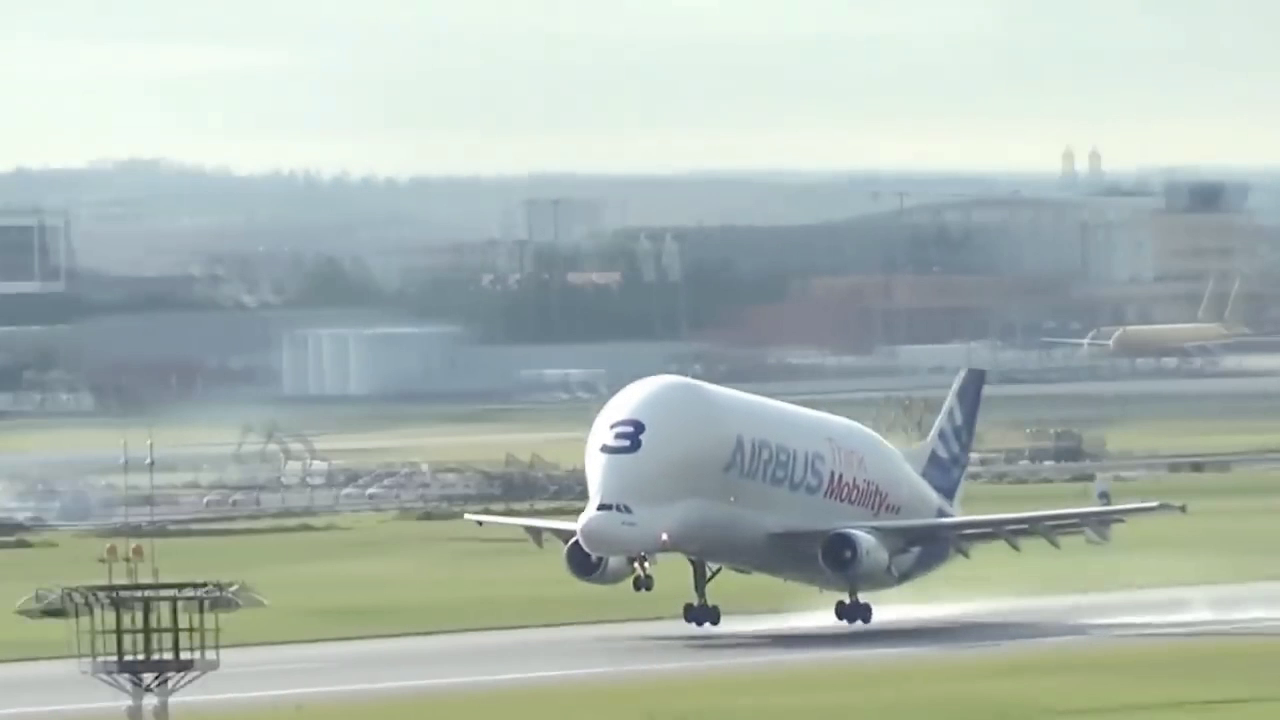

In [97]:
frame = cv2.imread('frames/450.png')
if frame is not None:
  cv2_imshow(frame)
else:
  print("Error: Could not read the image file.")

Extraindo descritores do frames do vídeo usando BRIEF Descriptor

In [98]:
# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
    onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print(file)

        img_path = join(frames_dir, file)

        img = cv2.imread(img_path)

        # opcional: redimensiona a imagem
        # img = cv2.resize(
        #  img, (160, 160), interpolation=cv2.INTER_CUBIC)

        # Initiate STAR detector
        star = cv2.xfeatures2d.StarDetector_create()

        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

        # find the keypoints with STAR
        kp = star.detect(img,None)

        # compute the descriptors with BRIEF
        kp, feat = brief.compute(img, kp)

        print(len(kp))
        print(np.shape(feat))
        # print(feat)

        feat_path = join(features_dir, file)

        # store the data as binary data stream
        with open(feat_path + ".brief", "wb") as f:
            pickle.dump(feat.tolist(), f)

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

690.png
469
(469, 32)
360.png
155
(155, 32)
150.png
459
(459, 32)
30.png
477
(477, 32)
480.png
139
(139, 32)
600.png
503
(503, 32)
240.png
164
(164, 32)
630.png
496
(496, 32)
510.png
70
(70, 32)
180.png
507
(507, 32)
570.png
431
(431, 32)
390.png
395
(395, 32)
210.png
168
(168, 32)
120.png
478
(478, 32)
0.png
419
(419, 32)
450.png
209
(209, 32)
90.png
467
(467, 32)
330.png
151
(151, 32)
270.png
176
(176, 32)
300.png
149
(149, 32)
540.png
423
(423, 32)
660.png
434
(434, 32)
720.png
59
(59, 32)
420.png
101
(101, 32)
60.png
474
(474, 32)


**Criação do vocabulário visual**

**1. Clusterização**

In [99]:
from sklearn.cluster import KMeans
import time

In [100]:
cluster_file = cluster_dir + "cluster.cluster"

In [101]:
# número de clusters
k = 64

# núimeros de dimensões das features
dim = 32

In [102]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1

        if (i % dim) == 0:
            desc += "\n"

    output_file.write(desc)

In [103]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)

        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))

if listOfFeat:
    t1 = time.time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
    t2 = time.time()
    tf = t2 - t1

    print(tf)

    saveCentroids (kmeans, output_file, dim)
else:
    print("Error: No features were loaded. Please ensure frames were extracted and features were computed successfully.")

output_file.close()

(7973, 32)
0.3726930618286133


In [104]:
!cat cluster/cluster.cluster

78.49 99.9 173.15 179.56 122.64 36.92 170.95 193.64 119.92 87.15 128.36 82.36 66.23 161.77 156.15 185.67 175.36 59.56 208.92 140.41 192.54 180.41 149.9 98.38 167.72 152.87 108.21 123.72 187.59 130.51 187.87 100.36 
67.71 49.14 150.29 148.45 190.29 68.36 168.31 195.59 96.55 93.83 114.78 35.55 84.13 175.73 36.81 38.87 95.57 186.47 138.56 160.89 152.11 84.32 191.61 40.66 235.25 172.25 125.44 113.9 81.96 71.31 143.16 195.22 
168.3 132.05 196.36 125.32 209.27 195.82 69.24 130.52 226.83 113.36 198.16 119.07 115.48 77.07 126.93 233.26 108.19 62.55 145.88 132.27 154.74 171.47 136.55 197.48 51.54 103.17 153.67 160.71 113.67 179.13 65.99 76.85 
144.31 101.08 87.28 165.55 35.29 103.96 169.5 75.26 75.38 228.6 72.68 206.89 202.61 68.38 164.55 170.74 212.99 195.43 137.46 111.21 81.76 109.26 162.55 163.46 22.7 199.18 172.65 91.13 219.35 188.44 175.4 130.49 
93.5 180.51 171.04 107.58 223.22 98.46 68.84 102.3 108.03 44.19 138.72 72.53 162.78 222.56 120.18 65.81 36.75 126.1 86.75 84.99 175.41 110.16 47.

**2. Bag of Visual Word**

In [105]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1

        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Done
CPU times: user 4.87 s, sys: 17.9 ms, total: 4.88 s
Wall time: 4.89 s


In [106]:
!cat bow/450.png.brief.bow

1 3 0 3 0 5 7 7 4 2 1 0 2 2 2 4 0 3 4 6 4 4 1 7 0 9 3 7 4 3 2 6 6 9 2 2 12 3 3 4 6 1 1 4 5 1 1 5 1 7 2 1 3 5 2 3 1 3 5 0 2 0 2 1 

**Busca**

Utilizando um arquivo de BoW de uma imagem do próprio vídeo

In [107]:
%%time
# leitura das imagens do diretório

bow_file_path = bow_dir + "450.png.brief.bow"

if os.path.exists(bow_file_path):
    q = np.loadtxt(bow_file_path)

    onlyfiles = []
    if os.path.exists(bow_dir):
        onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

        # processa cada arquivo de imagem de um diretório
        for file in onlyfiles:

            feat_path = join(bow_dir, file)

            item = np.loadtxt(feat_path)

            # print(item)
            # print(item.shape)

            dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

            print(str(file) + ": " + str(dist))
else:
    print(f"Error: The file {bow_file_path} was not found. Please ensure video frames were extracted and processed to create the BOW files.")

360.png.brief.bow: 28.74021572639983
690.png.brief.bow: 47.45524207081869
270.png.brief.bow: 26.095976701399778
510.png.brief.bow: 28.407745422683583
300.png.brief.bow: 26.38181191654584
570.png.brief.bow: 40.963398296528084
0.png.brief.bow: 45.0111097397076
240.png.brief.bow: 27.147743920996454
210.png.brief.bow: 25.238858928247925
600.png.brief.bow: 52.51666402200353
540.png.brief.bow: 41.90465367951393
390.png.brief.bow: 39.774363602702685
630.png.brief.bow: 49.56813492557492
180.png.brief.bow: 54.954526656136345
420.png.brief.bow: 24.166091947189145
480.png.brief.bow: 22.494443758403985
660.png.brief.bow: 42.95346318982906
120.png.brief.bow: 54.04627646748664
60.png.brief.bow: 56.293871780150276
720.png.brief.bow: 37.73592452822641
450.png.brief.bow: 0.0
330.png.brief.bow: 27.313000567495326
30.png.brief.bow: 55.08175741568164
90.png.brief.bow: 51.69139193328034
150.png.brief.bow: 46.62617290749907
CPU times: user 7.5 ms, sys: 1 ms, total: 8.5 ms
Wall time: 9.07 ms


Altere a quantidade de clsuter para k = 64 e repita o procedimento acima, compare os resultados de cálculo de distância. O que mudou em relação às distâncias calculadas?

**Utilizando uma nova imagem qualquer**

Calculando features locais da imagem de consulta

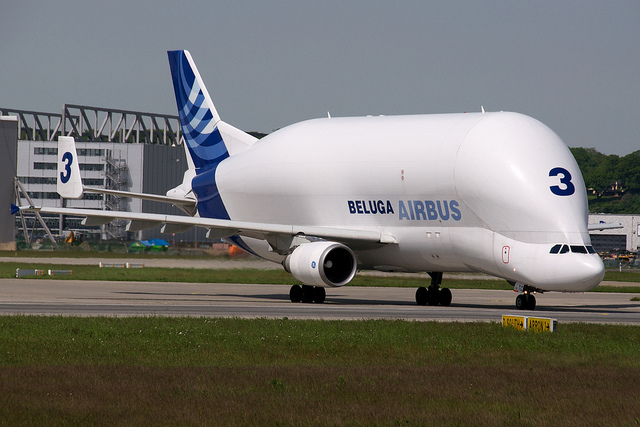

In [116]:
frame = cv2.imread('beluga.jpg')
if frame is not None:
  cv2_imshow(frame)
else:
  print("Error: Could not read the image file 'search/beluga.jpg'. Please ensure it exists.")

In [119]:
q = "beluga.jpg"
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

In [120]:
img_search = cv2.imread(q)

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img_search,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_search, kp)

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
if feat is not None:
  with open(q_feature, "wb") as f:
    pickle.dump(feat.tolist(), f)
else:
  print("Error: Could not compute features for the search image. Please ensure the image is valid and keypoints were detected.")

280
(280, 32)


Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [121]:
# leitura dos centroids do arquivo
try:
    centroids = np.loadtxt(cluster_file)
except UserWarning:
    print(f"Error: Could not load centroids from {cluster_file}. Please ensure the clustering step was successful.")
    centroids = None


if centroids is not None and centroids.shape[0] > 0:
    # obtem o número de centroids (palavras visuais)
    clusters = centroids.shape[0]

    try:
        with open(q_feature, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)
    except (EOFError, FileNotFoundError):
        print(f"Error: Could not load search image features from {q_feature}. Please ensure the search image was processed successfully.")
        feat = None

    if feat is not None:
        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
                dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
                if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1

        with open(q_bow, 'w') as f:
            for item in bow:
                f.write("%s " % item)

        print("Done")
    else:
        print("BOW calculation skipped due to missing search image features.")
else:
    print("BOW calculation skipped due to missing or empty centroids.")

Done


In [126]:
!cat beluga.jpg.brief.bow

4 1 3 8 4 5 8 5 2 4 4 5 2 2 6 3 0 3 9 10 4 5 3 7 1 4 12 8 6 5 3 3 2 5 6 4 5 5 9 6 4 2 5 5 5 0 1 2 1 12 3 4 1 11 9 3 1 4 3 3 1 2 2 5 

Realizando a consulta

In [127]:
# leitura das imagens do diretório

if os.path.exists(q_bow):
    q = np.loadtxt(q_bow)

    onlyfiles = []
    if os.path.exists(bow_dir):
        onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

        # processa cada arquivo de imagem de um diretório
        for file in onlyfiles:

            feat_path = join(bow_dir, file)

            item = np.loadtxt(feat_path)

            # print(item)
            # print(item.shape)

            dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

            print(str(file) + ": " + str(dist))
else:
    print(f"Error: The search image BOW file {q_bow} was not found. Please ensure the search image was processed and its BOW calculated.")

360.png.brief.bow: 30.773365106858236
690.png.brief.bow: 40.38564101261734
270.png.brief.bow: 30.59411708155671
510.png.brief.bow: 34.438350715445125
300.png.brief.bow: 30.380915061926625
570.png.brief.bow: 34.79942528261063
0.png.brief.bow: 41.340053217188775
240.png.brief.bow: 30.757112998459398
210.png.brief.bow: 30.854497241083024
600.png.brief.bow: 45.77116996538323
540.png.brief.bow: 37.403208418530085
390.png.brief.bow: 39.28103868280471
630.png.brief.bow: 42.77849927241488
180.png.brief.bow: 48.425200051213004
420.png.brief.bow: 32.78719262151
480.png.brief.bow: 31.0
660.png.brief.bow: 36.823905279043935
120.png.brief.bow: 47.958315233127195
60.png.brief.bow: 51.10772935672255
720.png.brief.bow: 44.35087372307337
450.png.brief.bow: 25.199206336708304
330.png.brief.bow: 30.28200785945344
30.png.brief.bow: 50.368641037852115
90.png.brief.bow: 47.25462940284264
150.png.brief.bow: 43.18564576337837


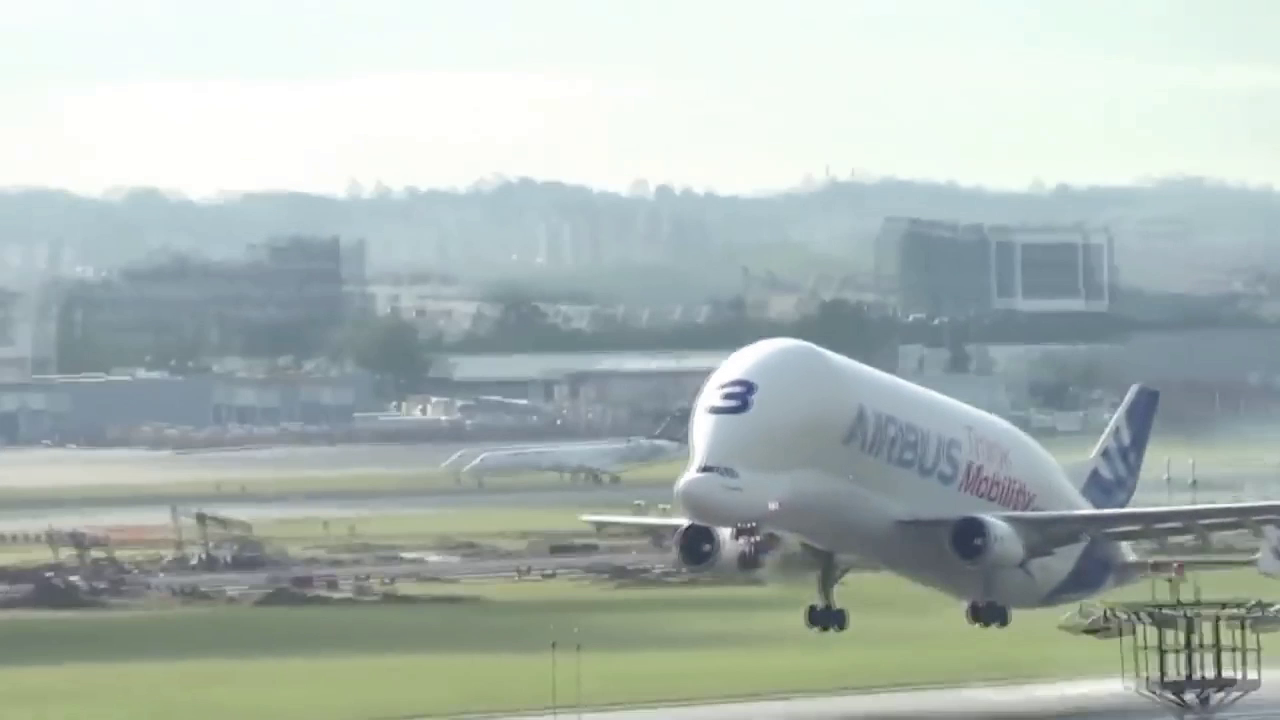

In [128]:
frame = cv2.imread('frames/480.png')
if frame is not None:
  cv2_imshow(frame)
else:
  print("Error: Could not read the image file.")